# The Data

---

I am going to work with a dataset provided in Kaggle by "Banco Santander", where they describe the dataset as:
"You are provided with an anonymized dataset containing numeric feature variables, the binary target column, and a string ID_code column.
The task is to predict the value of target column in the test set."

Was uploaded as a competition on the site 4 years ago: "In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem".

I will use several assembly algorithms to perform the classification.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # supress warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import VarianceThreshold


In [3]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [5]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv") 

Let's explore the data

In [6]:
train_df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


We can see that have 200000 rows of data and 201 features (excluding the binary target)

In [7]:
train_df.drop("ID_code", axis=1, inplace=True)

In [8]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


We don´t have null values

Text(0.5, 1.0, 'Ratio of target class')

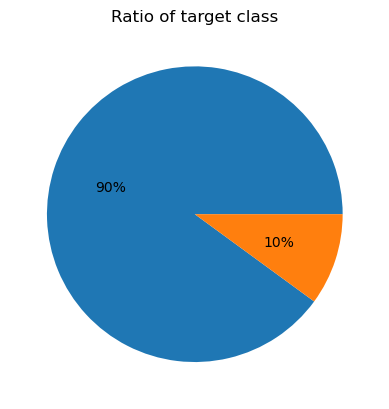

In [9]:
occurrences = train_df['target'].value_counts().to_frame().rename(index=int, columns={'target': 'Occurrences'})
labels = ['First class', 'Second class']


#create pie chart
plt.pie(occurrences.Occurrences, autopct='%.0f%%')
plt.title("Ratio of target class")

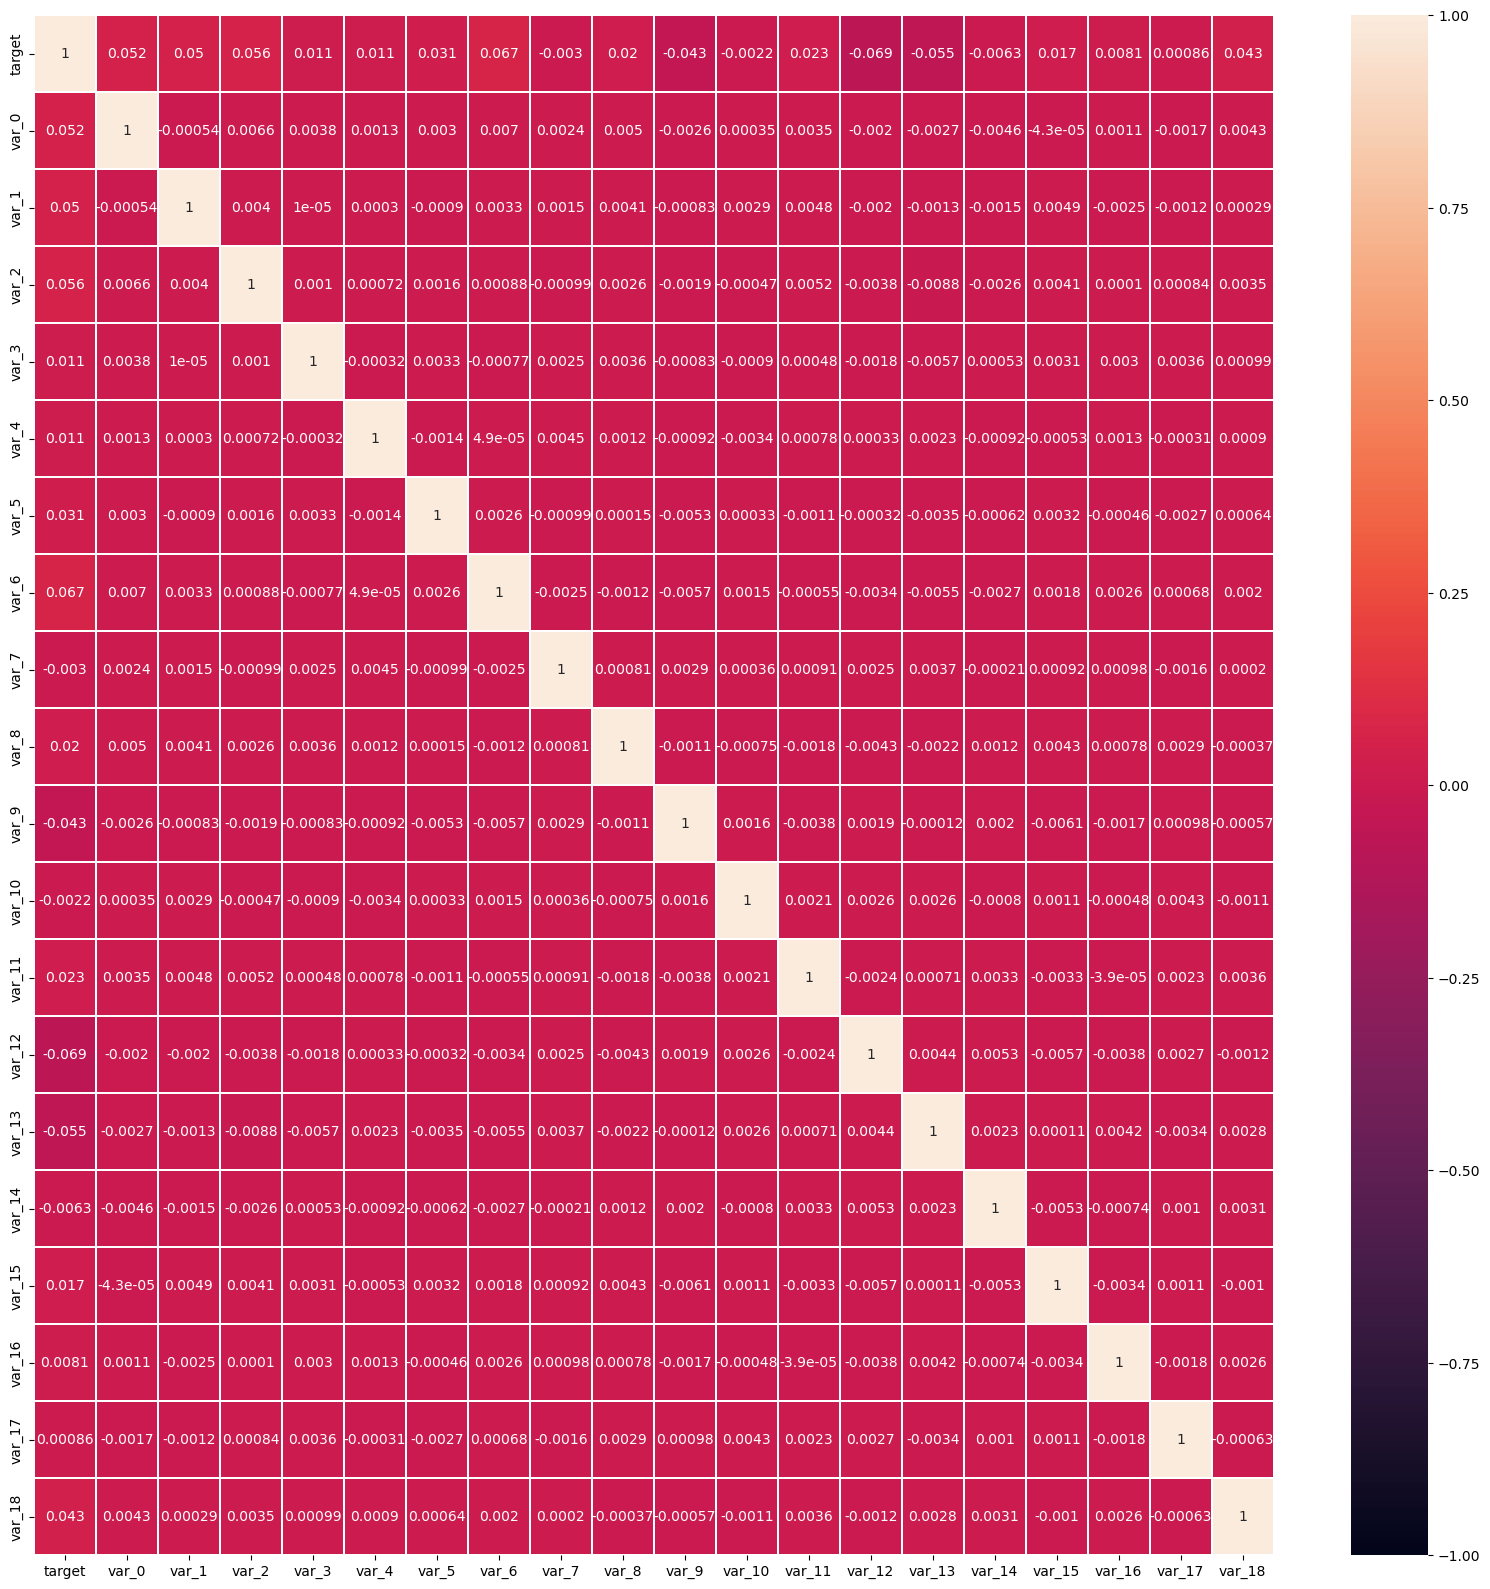

In [10]:
corr=train_df.iloc[:,:20].corr()
fig, ax=plt.subplots(figsize=(20,20))
Cmap=sns.diverging_palette(220,10,as_cmap=True)
_= sns.heatmap(corr,  ax=ax, annot=True,   vmin=-1, linewidths=0.2)

We can see the Non-correlation between features

### Low Variance Features

The VarianceThreshold class removes the features that do not contribute information to our dataset, calculating their variance.

That is, all the features that have a variance (variability) lower than a defined `threshold` are filtered out.

In [11]:
pd.options.display.float_format = '{:.6f}'.format
train_df.apply(np.var).sort_values(ascending=False)[:8]

var_45    458.167947
var_74    199.164220
var_117   176.826938
var_90    172.995534
var_97    159.829026
var_120   146.918292
var_70    142.843414
var_61    135.092249
dtype: float64

We set the dataset to class, with the hyperparameter `threshold` = 0.5.

In [12]:
from sklearn.feature_selection import VarianceThreshold


X = train_df.drop("target", axis=1)
y = train_df.target

vt = VarianceThreshold(threshold=0.5) # Instanciamos la clase con un threshold=0.5
df_vt = vt.fit_transform(X)
df_vt[:2]

array([[  8.9255,  -6.7863,  11.9081,   5.093 ,  11.4607,  -9.2834,
          5.1187,  18.6266,  -4.92  ,   5.747 ,   2.9252,   3.1821,
          0.5745,   8.7989,   5.7487,  -7.2393,   4.284 ,  30.7133,
         10.535 ,  16.2191,   2.5791,  14.3831,  -5.1488,  -0.4073,
          4.9306,   5.9965,  -0.3085,  12.9041,  -3.8766,  16.8911,
         10.5785,   0.6764,   7.8871,   4.6667,   3.8743,  -5.2387,
          7.3746,  11.6418,  -7.017 ,   5.9226, -14.2136,  16.0283,
          5.3253,  29.046 ,  -0.694 ,   5.1736,  -0.7474,  14.8322,
         11.2668,   5.3822,   2.0183,  10.1166,  16.1828,   4.959 ,
          2.0771,  -0.2154,   8.6748,   9.5319,   5.8056,  22.4321,
         -4.701 ,  21.6374,   5.1999,   8.86  ,  43.1127,  18.3816,
         -2.344 ,  23.4104,   6.5199,  12.1983,  13.6468,  13.8372,
          1.3675,   2.9423,  -4.5213,  21.4669,   9.3225,  16.4597,
          7.9984,  -1.7069, -21.4494,  11.0924,  14.8421,   8.9642,
         16.2572,   2.1743,  -3.4132,   9.4763, 

The `get_support()` method returns a mask with the selected features.

In [13]:
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,

In [14]:
X.columns[vt.get_support()]

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=178)

And make the new DataFrame

In [15]:
Data_X = pd.DataFrame(df_vt, columns = X.columns[vt.get_support()])
Data_X.sample(4)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
176308,6.830100,-3.059700,7.773300,6.057300,11.846600,-11.215700,5.933500,13.975800,-1.509900,8.357800,...,11.608500,5.331500,1.270400,1.810500,21.567500,0.640000,-1.351800,8.185200,17.848700,-11.327200
116879,14.084300,-3.872000,8.246300,5.181400,12.849700,7.904600,3.422900,17.507600,0.515000,7.477500,...,4.593800,8.764200,1.076700,2.633600,20.779400,0.882000,-0.693500,9.880400,21.825000,-18.496900
104903,8.212400,-1.748500,9.598600,11.182900,13.692100,-8.238700,5.343000,15.889000,2.430300,9.141400,...,14.215700,10.348100,0.871900,0.840600,13.809300,0.215100,-6.091200,8.434800,18.016000,-25.157600
40994,8.965400,1.406800,12.132900,6.179600,12.047300,-16.603700,6.712300,17.911900,6.141200,9.009700,...,7.762900,6.341600,0.076000,-8.006400,17.027800,0.069800,-7.405800,6.834300,17.295700,11.447300


We have 23 feature less.

An really good implementation of Chi-square for the feature selection is:

In [16]:
#from sklearn.feature_selection import SelectKBest, chi2


# X = Data.drop("target", axis=1)
# y = Data.target
# bestfeatures_k = SelectKBest(score_func=chi2, k=10)  ARE THE 10 BEST FEATURES (K = 10)
# fit_k = bestfeatures_k.fit_transform(X,y)

# MAKE THE DATAFRAME
# df_reduced = pd.DataFrame(fit_k, columns = X.columns[bestfeatures_k.get_support()])
# df_reduced_.sample(4)

# SEE THE SCORE OF EACH FEATURE
# dfscores = pd.DataFrame(bestfeatures_k.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# scores = pd.concat([dfcolumns,dfscores],axis=1)
# scores.columns = ['Feature','Score']
# print(scores.nlargest(10,'Score'))

Other method more effective but more computationally expensive, is Recursive Feature Elimination (RFE) or Recursive Feature Elimination with Cross Validation (RFECV).

*Recursive feature elimination* trains an **estimator** on the total number of features and calculates the importance of each feature. The least important feature is *removed from the set* and retrained with the remaining features. 

The process is repeated recursively until the **number of features previously defined** is reached.

The `RFE()` method has the arguments:

* `estimator`: the estimator used to train and evaluate. It can be any supervised algorithm that returns the importance of each feature.
* `n_features_to_select`: the final number of features.
* steps`: features that are removed per iteration.

Recursive feature elimination with cross-validation is similar to *RFE*, but **determines the number of features to select using CrossValidation**.

The arguments are similar, but we *no longer report how many final variables we want*. And on the other hand, we have to tell it how we do the CV. 

The `RFECV()` method has the arguments:

* `estimator`: the estimator used to train and evaluate. It can be any supervised algorithm that returns the importance of each feature.
* `cv`: determines the cross-validation method.
* `steps`: features that are removed per iteration.

In [17]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import RFE

# estimator = DecisionTreeClassifier()
# rfe = RFE(estimator, n_features_to_select=6, step = 1)
# rfe.fit(X_std, y)

# scores = pd.DataFrame()
# scores["Attribute Name"] = X.columns; scores["Ranking"] = rfe.ranking_; scores["Support"] = rfe.support_

# print(scores.sort_values('Ranking'))

In [18]:
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold
# from sklearn.tree import DecisionTreeClassifier

# estimator = DecisionTreeClassifier()
# kf = StratifiedKFold(n_splits = 5, shuffle = True)

# rfecv = RFECV(estimator, cv=kf, step = 1)
# rfecv.fit(X_std, y)

# scores = pd.DataFrame()
# scores["Attribute Name"] = X.columns; scores["Ranking"] = rfecv.ranking_; scores["Support"] = rfecv.support_

# print(scores.sort_values('Ranking'))


The last method is use GENETIC ALGORITHMS

### Because it is so unbalanced, we must balance our data.

In [19]:


X_train, X_test, y_train, y_test = train_test_split(Data_X, y, stratify=y, test_size=0.30, random_state = 123)

################################ BALANCED WITH UNDER SAMPLING ############## 

from imblearn.under_sampling import RandomUnderSampler

undersampler=RandomUnderSampler(sampling_strategy='majority',random_state=123)

X_train_us,y_train=undersampler.fit_resample(X_train,y_train)

print(y_train.value_counts())
################################################################

X_columns = X_train_us.columns

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_us)

X_test_std = scaler.transform(X_test)

0    14069
1    14069
Name: target, dtype: int64


In [20]:
from scikitplot.metrics import plot_roc

def CM(y_pred, y_proba, y_testing=y_test):

    confusion_matrix(y_testing, y_pred)
    sns.heatmap(confusion_matrix(y_testing, y_pred), annot=True)
    plt.ylabel('Real')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
 
    print (classification_report(y_testing, y_pred))

    plot_roc(y_testing, y_proba, plot_micro = False, plot_macro= False)
    
    return

# We can always use GridSearch or RandomSearch algorithms to optimize the hyperparameters.

In order for the results to be consistent, the models must be exposed to exactly the same cross-validation scheme.
To compare the different algorithms we set up the function `evaluate_performance`, which takes as input an estimator and a string with the name we want to give it, and executes a `cross_val_score`.

In [21]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV


cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

def performance_grid(model, name, X, y, cv):
    s = cross_val_score(model, X, y, cv=cv, n_jobs=-1, scoring="accuracy")
    print("Performance of {}:\t{:0.3} ± {:0.3}".format( \
        name, s.mean().round(3), s.std().round(3)))

In [22]:
def feature_importance(Importance):

    indices = np.argsort(Importance)[::-1]
    names = X.columns[indices]

    importancia_features = pd.DataFrame(Importance, index = X.columns, columns=['importancia'])
    importancia_features_sort = importancia_features.sort_values('importancia', ascending=False)
    print(importancia_features_sort[0:10])

    plt.figure()
    plt.title("Feature Importance")
    plt.bar(range(X.shape[1]), Importance[indices])
    plt.xticks(range(X.shape[1]), names, rotation=90)
    plt.show()

    return

## First Algorithm: Bagging

---

Bagging Predictors (Abstract from <a href="https://www.stat.berkeley.edu/~breiman/bagging.pdf" target="_blank">paper</a> Leo Breiman 1994):


“Bagging predictors is a method for generating multiple versions of a predictor and using these to get an aggregated predictor. 

The **aggregation averages** over the versions when predicting a numerical outcome and does a **plurality vote** when predicting a class. 

The multiple versions are formed by making **bootstrap replicates of the learning set** and using these as new learning sets. 

Tests on real and simulated data sets using classification and regression trees and subset selection in linear regression show that bagging can give substantial gains in accuracy. 

The **vital element is the instability of the prediction method**. 

**If perturbing the learning set can cause significant changes in the predictor constructed, then bagging can improve accuracy**.”

With "max_samples" and "max_features" we control the size of the subsets, "bootstrap" and "bootstrap_features" take care of whether samples and features are taken with or without replacement, "n_estimators" control the number of base classifiers to train and "n_jobs" is the number of jobs running in parallel.

I going to use Linear Regression for base model.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

base_LR = LogisticRegression()

Let´s see the performance of the base model.

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     53971
           1       0.26      0.75      0.39      6029

    accuracy                           0.76     60000
   macro avg       0.61      0.76      0.62     60000
weighted avg       0.89      0.76      0.80     60000



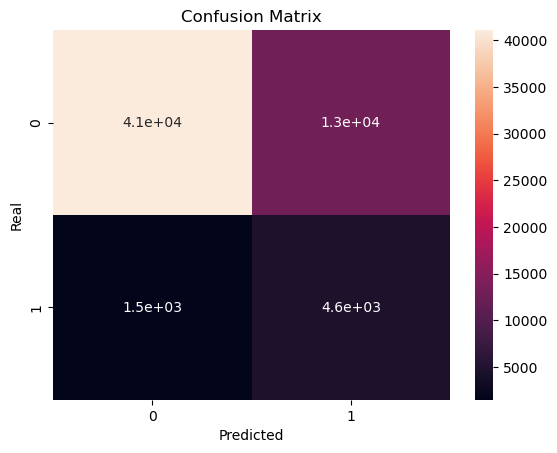

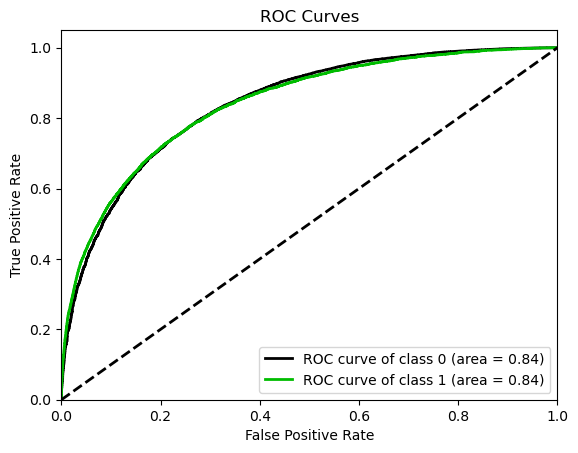

In [24]:
base_LR.fit(X_train_std, y_train)
predict_base_LR = base_LR.predict(X_test_std)
predict_proba_base_LR = base_LR.predict_proba(X_test_std)

CM(y_pred = predict_base_LR, y_proba = predict_proba_base_LR)


Make the bagging

In [25]:
bag_LR_base = BaggingClassifier(base_estimator = base_LR)

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     53971
           1       0.26      0.75      0.39      6029

    accuracy                           0.76     60000
   macro avg       0.61      0.76      0.62     60000
weighted avg       0.89      0.76      0.80     60000



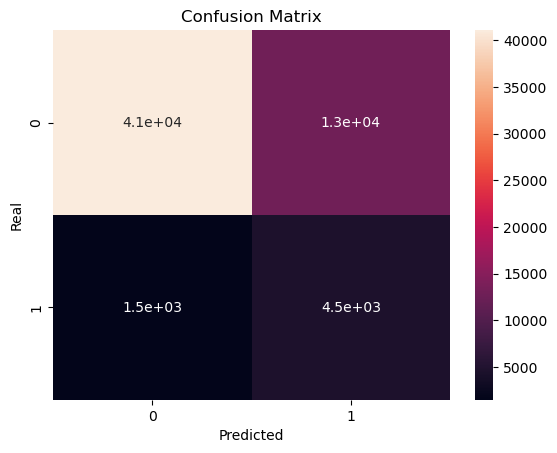

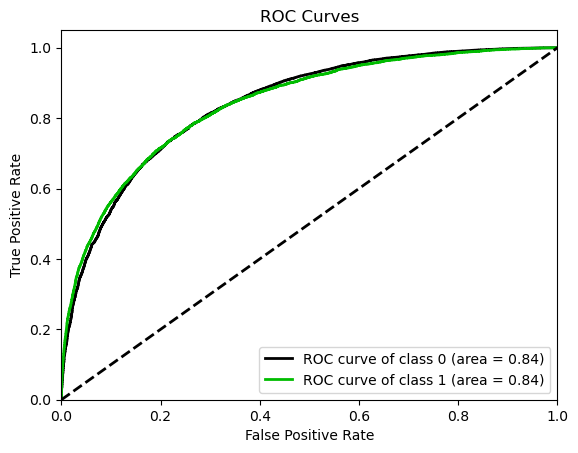

In [26]:
bag_LR_base.fit(X_train_std, y_train)
predict_base_bag = bag_LR_base.predict(X_test_std)
predict_proba_base_bag = bag_LR_base.predict_proba(X_test_std)

CM(y_pred = predict_base_bag, y_proba = predict_proba_base_bag)


In [27]:
performance_grid(bag_LR_base, "Bagging with LR", X_train_std, y_train, cv)

Performance of Bagging with LR:	0.762 ± 0.006


## Second Algorithm: Random Forest

---

Is like a bagging of decision trees models base.

This helps to lower the disadvantage of the decision trees of having overfitting. With this ensemble, we are reducing the variance of the trees at the expense of a small increase in bias and loss of interpretability, but greatly increasing performance.

For a classification problem with p variables, $\sqrt{p}$ of the variables in each division is often used.

* k features are selected from the m total features (k being less than m) and a decision tree is created with these k features.

* N trees are created, always varying the number of k features.

* The result of each tree is saved, obtaining n outputs.

* The votes obtained for each selected "class" are calculated and the one with the most votes is considered as the final classification of our "forest".

We can use the OOB score (Out Of Bag) if we didn't have so much data.

* `n_estimators`: the number of iterations (i.e., of `base_estimators`) to train
* `criterion`: defines the impurity criterion for assessing the quality of the partitions (by default, it is `gini`) 
* `max_features`: the number of features that will be extracted to train each `base_estimator`. By default it is equal to `sqrt(X.shape[1])`.
* `bootstrap` and `bootstrap_features`: controls whether both n_samples and features are extracted with replacement.
* ` `max_depth`: the maximum depth of the tree.
* `min_samples_leaf`: the minimum number of n_samples to make up a leaf of the tree (terminal node)
* `min_samples_split`: the minimum number of n_samples to perform a split.

and several others that may become important when tuning. In general, the most important ones are: `n_estimators`, `max_features`, `max_depth` and `min_samples_leaf`.

In [28]:
from sklearn.ensemble import RandomForestClassifier

random_forest_base = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.96      0.72      0.83     53971
           1       0.23      0.74      0.35      6029

    accuracy                           0.73     60000
   macro avg       0.60      0.73      0.59     60000
weighted avg       0.89      0.73      0.78     60000



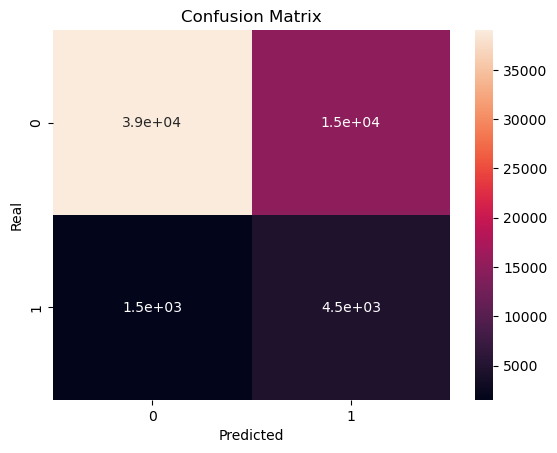

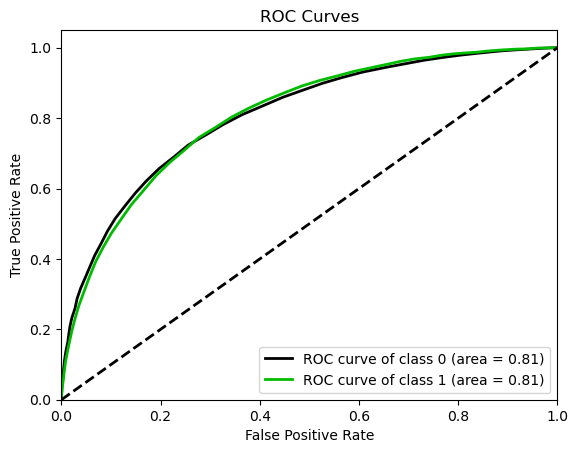

In [29]:
random_forest_base.fit(X_train_std, y_train)
predict_base_RF = random_forest_base.predict(X_test_std)
predict_proba_base_RF = random_forest_base.predict_proba(X_test_std)

CM(y_pred = predict_base_RF, y_proba = predict_proba_base_RF)

In [30]:
performance_grid(random_forest_base, "Random Forest", X_train_std, y_train, cv)

Performance of Random Forest:	0.728 ± 0.006


Make a little Grid Search

In [31]:
hyperparameters = {'criterion':['gini', 'entropy'],
                   'max_depth':[13, 17],
                   'n_estimators': [100, 300]}
grid_RF = GridSearchCV(random_forest_base, hyperparameters, cv = cv, n_jobs = -1, verbose = 2)
grid_RF.fit(X_train_std, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [13, 17], 'n_estimators': [100, 300]},
             verbose=2)

In [32]:
predict_GS_RF = grid_RF.predict(X_test_std)
predict_proba_GS_RF = grid_RF.predict_proba(X_test_std)

In [33]:
performance_grid(grid_RF.best_estimator_, "RF + GS", X_train_std, y_train, cv) 

Performance of RF + GS:	0.745 ± 0.005


              precision    recall  f1-score   support

           0       0.96      0.77      0.85     53971
           1       0.26      0.72      0.38      6029

    accuracy                           0.76     60000
   macro avg       0.61      0.75      0.62     60000
weighted avg       0.89      0.76      0.81     60000



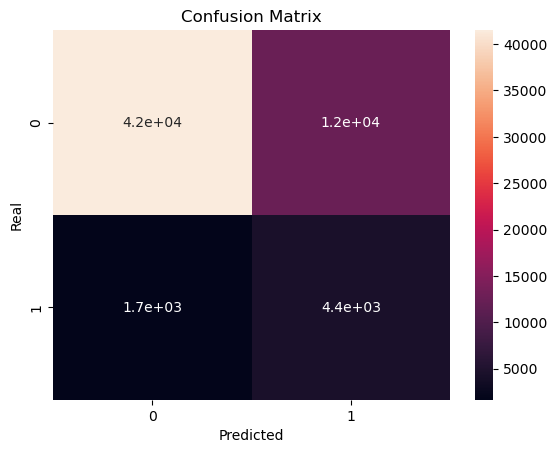

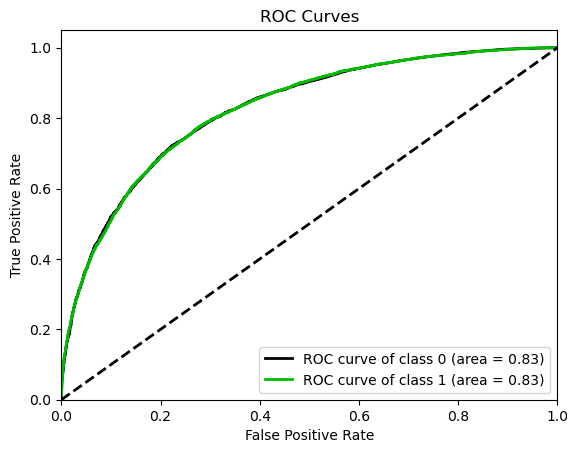

In [34]:
CM(y_pred = predict_GS_RF, y_proba = predict_proba_GS_RF)

#### Extra randomized trees

* The addition of an extra randomisation step produces Extremely randomised trees or **ExtraTrees**. 
   
* These are trained using bagging and the random variable selection method, as in an ordinary Random Forest, but with an additional random layer.

* Instead of calculating the local optimal variable/division combination (i.e. information gain), for each variable under consideration a random division (within the variable's range) is generated. And then the variable/division that maximises the gain is selected.

* The main difference is that **the split for each variable will not be the optimal one, but a randomly selected one**.

Another advantage is its lower computational cost

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     53971
           1       0.24      0.68      0.36      6029

    accuracy                           0.75     60000
   macro avg       0.60      0.72      0.60     60000
weighted avg       0.88      0.75      0.80     60000



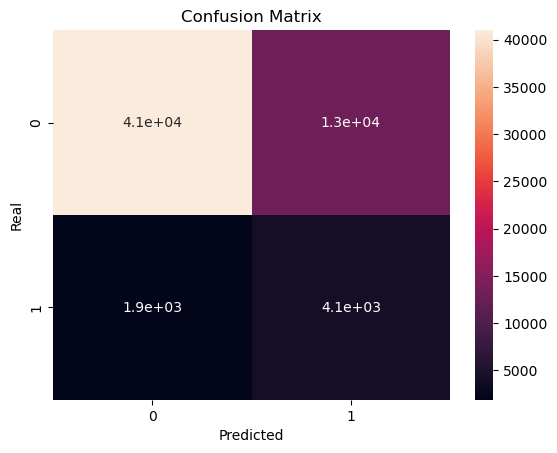

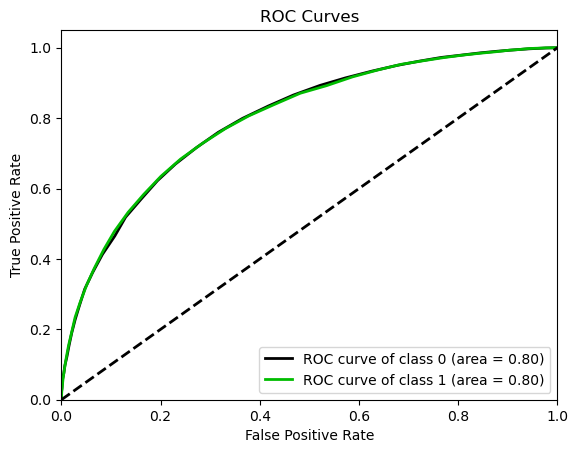

In [36]:
extra_tree.fit(X_train_std, y_train)
predict_base_EF = extra_tree.predict(X_test_std)
predict_proba_base_EF = extra_tree.predict_proba(X_test_std)

CM(y_pred = predict_base_EF, y_proba = predict_proba_base_EF)

In [37]:
performance_grid(extra_tree, "Extra tree", X_train_std, y_train, cv)

Performance of Extra tree:	0.718 ± 0.004


# Boosting


---

Now we are going to try other assembly models but where the training is **sequential**, and works on the basis of the errors of the previous model.

## Third Algorithm: Adaboost

---

The first iteration uses uniform weights for all records. In subsequent iterations, the weights are adjusted to emphasis the errors in the previous iteration. The final prediction is constructed by a weighted vote of the different base models. Where the weights for each base model depend on its training error. Adaboost takes a weak base model and tries to make it strong by retraining it on misclassified samples.

As hyperparameters we have:
base_estimator, base_regressor, n_estimators, learning_rate, loss 

This time let's use a tree model as a basis.

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

base_Tree = tree.DecisionTreeClassifier()
Ada_Tree = AdaBoostClassifier(base_estimator = base_Tree, random_state = 127)

              precision    recall  f1-score   support

           0       0.92      0.59      0.72     53971
           1       0.13      0.57      0.22      6029

    accuracy                           0.59     60000
   macro avg       0.53      0.58      0.47     60000
weighted avg       0.85      0.59      0.67     60000



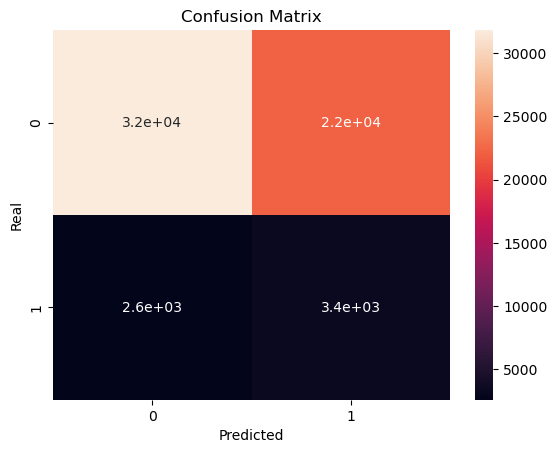

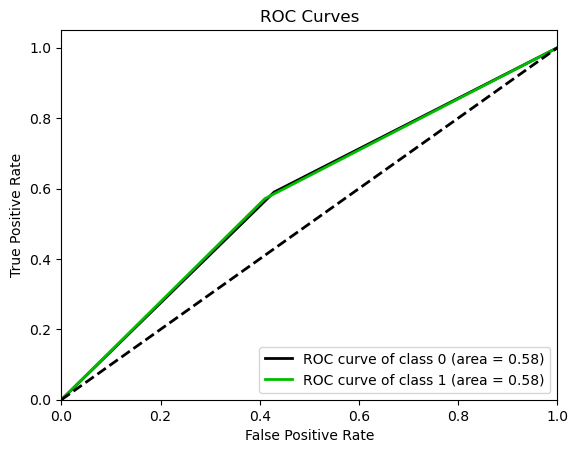

In [39]:
Ada_Tree.fit(X_train_std, y_train)
predict_base_Ada = Ada_Tree.predict(X_test_std)
predict_proba_base_Ada = Ada_Tree.predict_proba(X_test_std)

CM(y_pred = predict_base_Ada, y_proba = predict_proba_base_Ada)

In [40]:
performance_grid(Ada_Tree, "Ada boost with Tree", X_train_std, y_train, cv)

Performance of Ada boost with Tree:	0.579 ± 0.007


Make a little GridSearch to performance the hyperparameters.

In [41]:
params_Ada = {"n_estimators": [500,1000], "learning_rate":[0.01, 0.1]}

grid_Ada = GridSearchCV(AdaBoostClassifier(base_estimator=base_Tree ,random_state=1), param_grid=params_Ada, cv=cv, verbose=1, n_jobs=3)

grid_Ada.fit(X_train_std, y_train)

predict_GS_Ada = grid_Ada.predict(X_test_std)
predict_proba_GS_Ada = grid_Ada.predict_proba(X_test_std)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [42]:
grid_Ada.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.01,
                   n_estimators=500, random_state=1)

In [43]:
performance_grid(grid_Ada.best_estimator_, "AdaBoostClassifier + GS", X_train_std, y_train, cv)

Performance of AdaBoostClassifier + GS:	0.579 ± 0.005


              precision    recall  f1-score   support

           0       0.93      0.59      0.72     53971
           1       0.14      0.58      0.22      6029

    accuracy                           0.59     60000
   macro avg       0.53      0.58      0.47     60000
weighted avg       0.85      0.59      0.67     60000



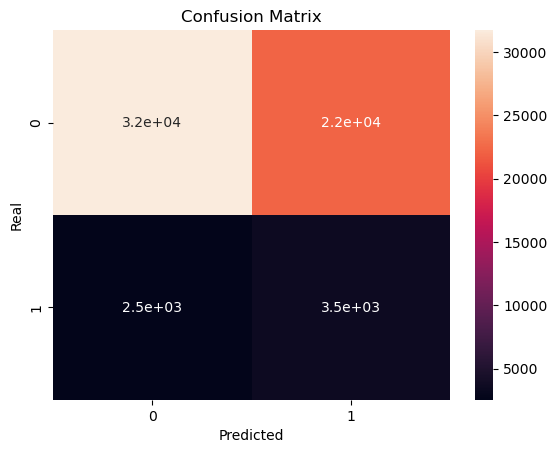

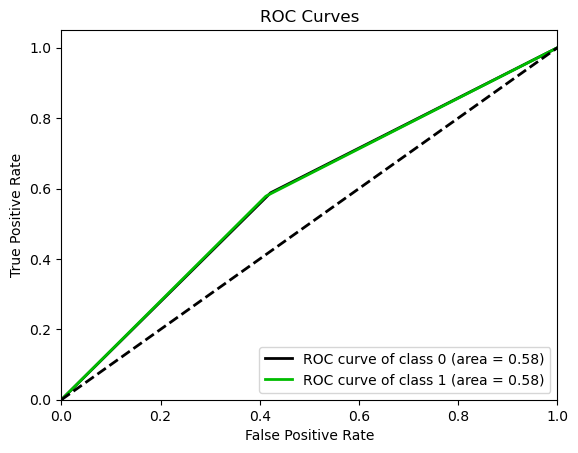

In [44]:
CM(y_pred = predict_GS_Ada, y_proba = predict_proba_GS_Ada)

## Fourth algorithm: Gradient Boosting
---

Gradient boosting solves supervised learning problems, which interpret boosting as an optimization problem, generate a loss function and seek to optimize. We train weak models sequentially to minimize the loss function.
The loss is represented by the residuals.    
We minimize the loss function of the weak models by averaging the predictions.We train weak models sequentially to minimize the loss function.
The loss is represented by the residuals.    
We minimize the loss function of the weak models by averaging the predictions.

As Hyperparameters we have: loss, learning_rate, n_estimators, subsample, criterion, max_depth.

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

GR_base = GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     53971
           1       0.26      0.71      0.38      6029

    accuracy                           0.77     60000
   macro avg       0.61      0.74      0.62     60000
weighted avg       0.89      0.77      0.81     60000



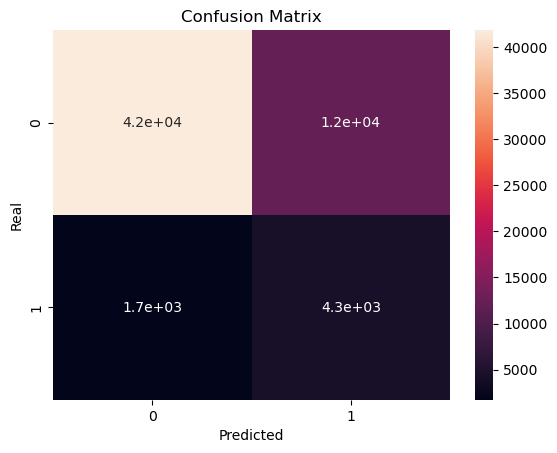

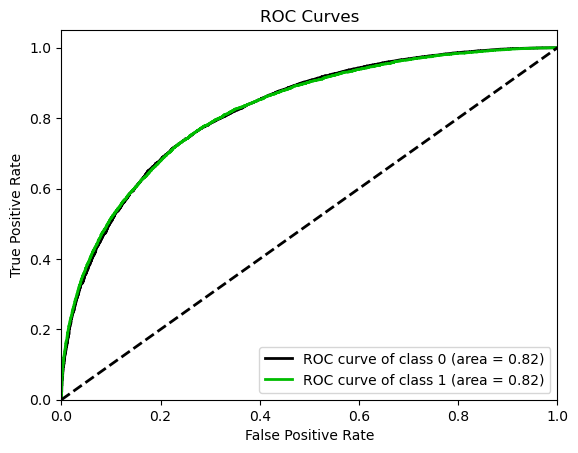

In [46]:
GR_base.fit(X_train_std, y_train)
predict_base_GR = GR_base.predict(X_test_std)
predict_proba_base_GR = GR_base.predict_proba(X_test_std)

CM(y_pred = predict_base_GR, y_proba = predict_proba_base_GR)

In [47]:
performance_grid(GR_base, "Gradient boosting", X_train_std, y_train, cv)

Performance of Gradient boosting:	0.737 ± 0.007


Make a little GridSearch to performance the hyperparameters.

In [48]:
params_GB = {'n_estimators':[100, 300] , 'learning_rate':[0.001, 0.1], 'max_depth' : [3, 4]}

grid_GB = GridSearchCV(GR_base, param_grid=params_GB, cv=cv, verbose=1, n_jobs=3)

grid_GB.fit(X_train_std, y_train)

predict_proba_GS_GR = grid_GB.predict_proba(X_test_std)
predict_GS_GR = grid_GB.predict(X_test_std)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [49]:
performance_grid(grid_GB.best_estimator_, "GradientBoostingClassifier + GS", X_train_std, y_train, cv)

Performance of GradientBoostingClassifier + GS:	0.771 ± 0.007


              precision    recall  f1-score   support

           0       0.97      0.80      0.87     53971
           1       0.29      0.76      0.42      6029

    accuracy                           0.79     60000
   macro avg       0.63      0.78      0.65     60000
weighted avg       0.90      0.79      0.83     60000



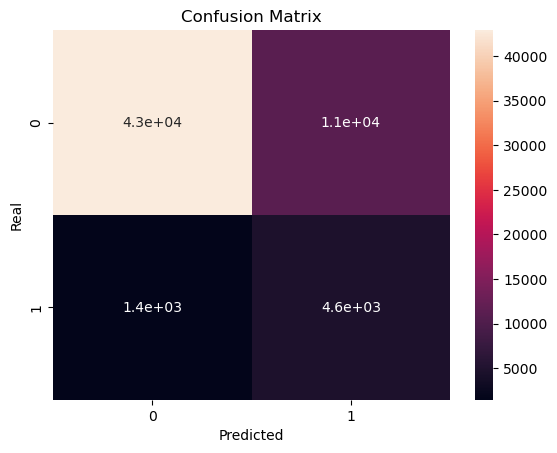

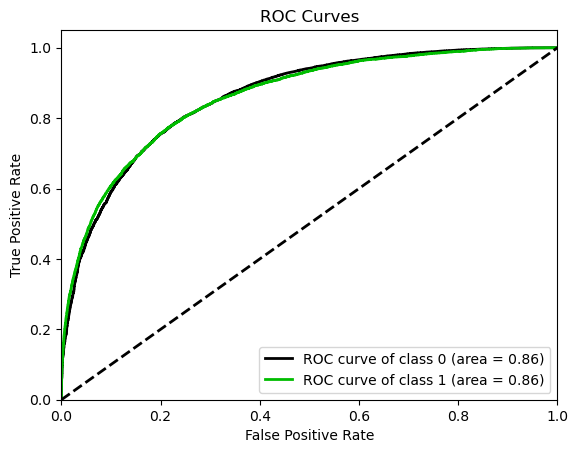

In [50]:
CM(y_pred = predict_GS_GR, y_proba = predict_proba_GS_GR)

## Fifth algorithm: XGBoost
---

XGBoost stands for Extreme Gradient Boosting; it is a specific implementation of the Gradient Boosting method that uses more accurate approximations to find the best tree model. It employs a number of improvements, the most important of which are:

1. It calculates second order gradients, i.e. second partial derivatives of the loss function (similar to Newton's method), which provides more information about the direction of the gradients and how to reach the minimum of our loss function. While gradient boosting uses the loss function of our base model (e.g. decision tree) as a proxy to minimize the overall model error, XGBoost uses the second order derivative as an approximation.

2. L1 and L2 regularization, which improves the generalization of the model.

XGBoost has additional advantages: training is very fast and can be paralyse  / distributed across clusters.

One of the improvements of XGBoost is the algorithm for finding splits. XGBoost implements three types of algorithms:

* Exact Greedy: Essentially it is a performant method of trying all possible split points and keeping the best one. This method is much slower than the next two.

* Approximate: This algorithm does not test all possible split points but only takes the percentiles of each variable and tests them. The bins are recalculated at each iteration.

* Histogram: the values of the continuous variables are stored in bins of a histogram, and reused throughout the computations. Then, the split is made between the histogram bins. It allows between 2 and 256 bins.

And more!
* Shrinkage (eta): basically this parameter removes weight from each new tree added to the assembly, multiplying its influence by a constant. 

* Column sampling: in the same way as Random Forest, this library implements column sampling to reduce overfitting and increase tree variability. 

* Row sampling (subsample): allows you to define what proportion of the rows are used to train each tree. 

* Absence of data: XGBoost will assign a default address to the null values in each node. That is, it will group them with the values to the left or to the right of the split, depending on which direction gives the best results.

In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
from xgboost.sklearn import XGBClassifier
model_XGB = XGBClassifier(n_jobs=-1, use_label_encoder=False)

In [53]:

params_XGB = {  
    "n_estimators": [100,50],      # Number of boosted trees to fit.
    "max_depth": [2,3],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1] }     # Boosting learning rate (xgb’s “eta”)

grid_XGB = GridSearchCV(model_XGB, param_grid=params_XGB, cv=cv, verbose=1, n_jobs=3)

grid_XGB.fit(X_train_std, y_train)

predict_GS_XGB = grid_XGB.predict(X_test_std)
predict_proba_GS_XGB = grid_XGB.predict_proba(X_test_std)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [54]:
grid_XGB.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [55]:
performance_grid(grid_XGB.best_estimator_, "XG Boost + GS", X_train_std, y_train, cv)

Performance of XG Boost + GS:	0.738 ± 0.005


              precision    recall  f1-score   support

           0       0.96      0.77      0.86     53971
           1       0.26      0.71      0.38      6029

    accuracy                           0.77     60000
   macro avg       0.61      0.74      0.62     60000
weighted avg       0.89      0.77      0.81     60000



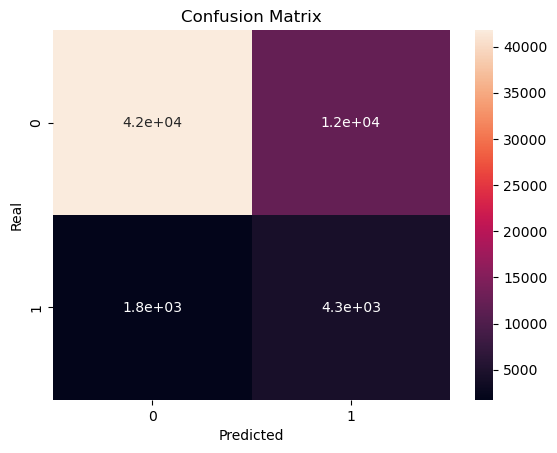

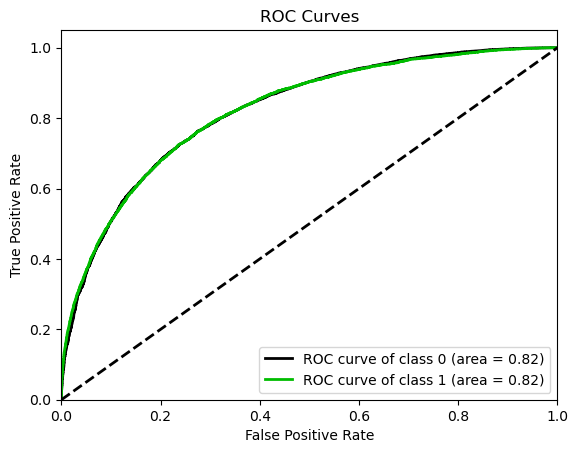

In [56]:
CM(y_pred = predict_GS_XGB, y_proba = predict_proba_GS_XGB)

## Sixth algorithm: Catboost
---

In [57]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
from catboost import CatBoostClassifier, Pool, metrics, cv, MetricVisualizer

In [59]:
model_cat = CatBoostClassifier(custom_loss=[metrics.Accuracy()],random_seed=42, logging_level='Silent')

In [60]:
model_cat.fit(X_train_std, y_train)

predict_base_CAT= model_cat.predict(X_test)
predict_proba_base_CAT= model_cat.predict_proba(X_test)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     53971
           1       0.10      1.00      0.18      6029

    accuracy                           0.10     60000
   macro avg       0.05      0.50      0.09     60000
weighted avg       0.01      0.10      0.02     60000



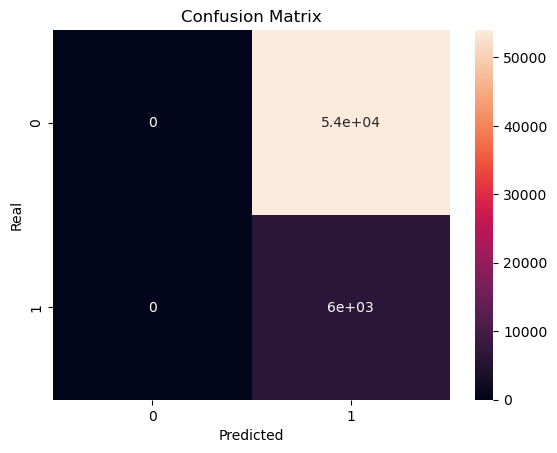

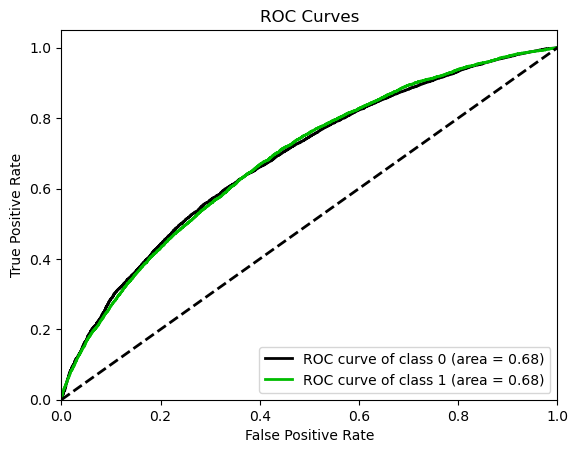

In [61]:
CM(y_pred = predict_base_CAT, y_proba = predict_proba_base_CAT)

With cross validation

In [62]:
cv_params = model_cat.get_params()
cv_params.update({
    'loss_function': metrics.Logloss()
})
cv_data = cv(Pool(X, y),cv_params,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [63]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])))
    
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

Best validation accuracy score: 0.92±0.00 on step 999
Precise validation accuracy score: 0.9165400038832692


## Feature Importance
---

Beyond the performance of the model, tomorrow we will want to modify our conduct or decisions in order to generate more cases of the category we want. For example, it will not affect in the same way whether the bank smells good or is treated with kindness in relation to whether a customer makes a bank deposit.

This can be achieved by analysing which features are most relevant to our model.

We have 5 models: Boosting, Random Forest, Ada boosting, Gradient Boosting, XGB boosting and Cat Boosting.

## LIME 
---

Lime is a tool that aids the interpretability of features

The parameters of the `LimeTabularExplainer` constructor that we are going to use are:
* training_data – numpy 2d array
* mode – “classification” or “regression”, 
* training_labels – labels for training data,  
* feature_names – list of names (strings) corresponding to the columns in the training data
* categorical_features – list of indices (ints) corresponding to the categorical columns. Everything else will be considered continuous. Values in these columns MUST be integers
* discretize_continuous – if True, all non-categorical features will be discretized into quartiles,  
* discretizer – only matters if discretize_continuous is True. Options are ‘quartile’, ‘decile’ or ‘entropy’,  

In [65]:
pip install lime

In [66]:
from lime.lime_tabular import LimeTabularExplainer

In [67]:
X_train_explainer = np.array(X_train_std)  # We must get it a array of numpy
type(X_train_explainer)



numpy.ndarray

In [68]:

explainer = LimeTabularExplainer(X_train_explainer, 
                                 mode = "classification",
                                 training_labels = y_train,
                                 feature_names = X_columns, 
                                 categorical_features  = [0, 1, 2, 3],
                                 discretize_continuous=True, 
                                 discretizer = 'decile')

We can take any column and interpret it, for simplicity, let's explore the row number 82

`explain_instance` receives as arguments:

* `data_row` is a 1d numpy array
* `predict_fn` – prediction function. For classifiers, this should be a function that takes a numpy array and outputs prediction probabilities. For regressors, this takes a numpy array and returns the predictions. For ScikitClassifiers, this is classifier.predict_proba(). For ScikitRegressors, this is regressor.predict()
* `num_features` – maximum number of features present in explanation.

And returns an instance of type `explanation`.

In [69]:

X_test_DF = pd.DataFrame(X_test_std, columns = X_train_us.columns)
X_test_DF

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.264968,0.077996,0.953128,-1.604707,0.733811,0.483543,0.130323,2.006176,-0.562321,-1.442414,...,1.478587,-0.745124,-1.405972,1.644003,-0.197106,-0.954311,-1.031581,-1.142923,0.111036,-0.584244
1,-0.970705,-2.326488,-1.519796,-0.263250,-0.086740,-1.679348,-2.150990,0.546593,1.211958,-0.449844,...,-1.532206,1.770628,0.786406,-0.886168,0.785136,2.260074,-1.229046,-0.050729,0.824663,-1.136283
2,-0.336440,-0.069959,0.347921,-0.255756,-0.136044,-1.478710,-1.731825,-0.492597,-2.251227,0.754422,...,-0.306483,-0.081004,0.970636,-0.774140,-0.611462,-0.450888,0.199586,-0.146626,-1.261288,0.095852
3,-0.823593,-1.012912,1.070248,0.067661,-1.217313,-0.125991,-0.605234,1.172262,0.155656,0.329363,...,0.427600,1.701403,-0.604375,-0.218849,1.888487,2.299542,0.796200,0.295308,-0.128275,0.664838
4,-1.086228,0.369588,-0.267070,0.601062,-1.434579,0.856135,0.721861,2.251027,-1.031914,-0.415938,...,-2.170956,0.803848,-0.006608,-0.332954,-0.078395,1.153461,0.996374,-0.883395,0.346071,1.613566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.833447,1.243786,0.865288,1.970841,-0.003490,0.503582,-1.696857,-0.965293,-1.274505,-0.058374,...,-1.244140,-1.255620,0.125989,-0.920098,-0.968638,-1.280265,-2.174323,-2.400988,1.270667,-2.137149
59996,-0.995578,0.682403,-0.006798,0.584905,0.426653,0.194667,1.685493,-0.866776,-0.522635,1.266905,...,0.510729,-1.173852,-1.030889,-1.773982,1.276352,-0.345091,-0.110810,-0.122198,-0.769706,0.182366
59997,-0.153588,-0.568036,-0.281016,-0.019884,0.170810,0.923747,0.412643,-0.872367,-0.732438,-1.549929,...,-0.625837,-1.524565,0.773836,-0.133183,-0.569453,-0.086630,0.434229,-0.166359,-0.205929,-2.371617
59998,0.839761,1.148309,-0.272582,1.624211,1.024392,0.568121,0.131443,0.456929,0.690257,-1.190936,...,1.117722,0.122117,-0.896535,0.640971,-0.491773,0.281258,-0.012295,0.937034,-0.924917,1.588048


In [70]:
# Must to be a numpy array
data_row = np.array(X_test_std[2])
explanation = explainer.explain_instance(data_row, grid_XGB.predict_proba, num_features=5)

`as_list`  returns the list of tuples (feature, weight) corresponding to the prediction

In [71]:
explanation.as_list()

[('var_21 <= -1.34', 0.06308262175829182),
 ('var_80 <= -1.34', 0.05965539868271226),
 ('var_164 > 1.29', 0.04987858549405042),
 ('var_81 > 1.24', -0.03752635350231184),
 ('0.88 < var_139 <= 1.27', -0.0360004475473672)]

The graph has three parts:

* The left panel shows the probability predicted by the model for index record 13 of belonging to class 0 and of belonging to class 1.

* The middle panel shows the features in order of importance. As in this case it is a binary classification, we see two colours. The features with orange colour are compatible with class 1 and those with blue colour are compatible with class 0. 
var_148 = 0.5 means that when the value of this feature satisfies this criterion, it supports class 0. 
The floating point number in the horizontal bars represents the relative importance of these features.

* The right panel uses the same colour coding as the other two. It contains the values corresponding to the DataFrame row (the one with index 13) whose prediction we are explaining.

In [72]:
explanation.show_in_notebook(show_table=True)

Here we can see better the feature explanation, like the bars in the middle of before.

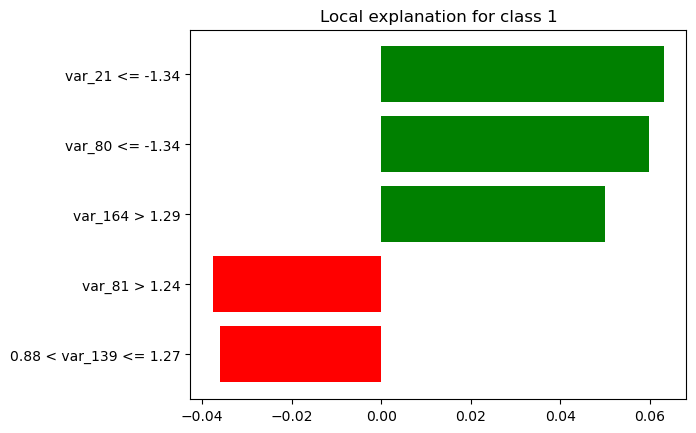

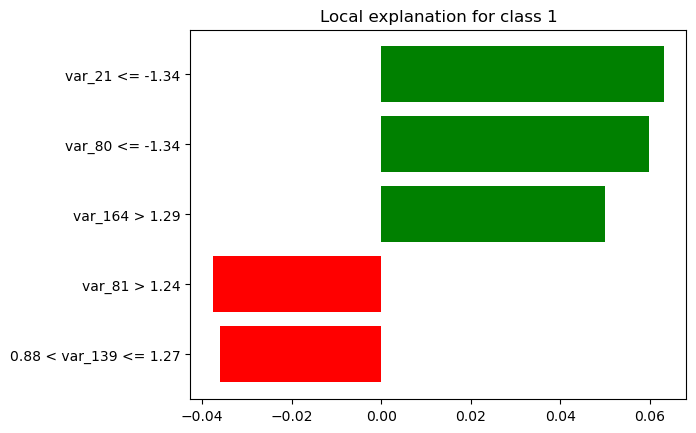

In [73]:
explanation.as_pyplot_figure() 

## Conclusions
---

Cat Boost was the worst model in all but one category. The two best were Gradient Boosting and XGB. Let's keep in mind that we balanced the categories and also did a pretty lean grid search.